In [1]:
import pandas                            as pd
import numpy                             as np

from   sklearn    import datasets        as ds
from   sklearn    import model_selection as ms
from   sklearn    import tree            as tr
from   sklearn    import metrics         as mt
from   matplotlib import pyplot          as plt

In [2]:
n_samples = 20000
n_features = 2
n_informative = 2
n_redundant= 0
random_state = 42

X,y = ds.make_classification(n_samples = n_samples,
                    n_features= n_features,
                    n_informative= n_informative,
                    n_redundant= n_redundant,
                    random_state=random_state
                    )

X, X_prod,y, y_prod = ms.train_test_split(X, y, test_size=0.2, random_state=random_state)

In [3]:
model = tr.DecisionTreeClassifier(max_depth=38)
model.fit(X,y)


yhat = model.predict(X)
acc = mt.accuracy_score(y, yhat)
print('Accuracy of model on train data is {}'.format(acc))

yhat_prod = model.predict(X_prod)
acc_prod = mt.accuracy_score(y_prod, yhat_prod)
print('Accuracy of model on new data is {}'.format(acc_prod))

Accuracy of model on train data is 1.0
Accuracy of model on new data is 0.8815


## Estrategy Train - Test

In [4]:
X_train,x_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2,random_state=random_state)

In [5]:
model = tr.DecisionTreeClassifier(max_depth=38)
model.fit(X_train,y_train)
yhat_test = model.predict(x_test)
acc_test = mt.accuracy_score(y_test,yhat_test)

In [6]:
#tuning
values = [i for i in range(1,60)]
test_score = list()
for i in values:
    model = tr.DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)
    yhat_test = model.predict(x_test)
    acc_test = mt.accuracy_score(y_test,yhat_test)
    test_score.append(acc_test)

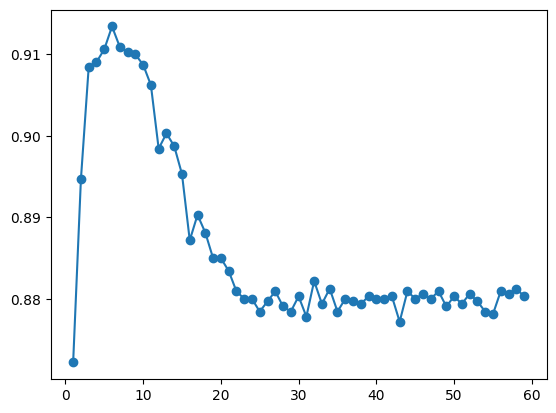

In [7]:
plt.plot(values, test_score, '-o', label = 'test');

In [8]:
# trained model
model_last = tr.DecisionTreeClassifier(max_depth=6)
model_last.fit(np.concatenate((X_train,x_test)), 
               np.concatenate((y_train,y_test)))
yhat_prod = model_last.predict(X_prod)
acc_prod = mt.accuracy_score(y_prod,yhat_prod)
print('Accuracy of model on test data is {}'.format(acc_test))
print('Accuracy of model on new data is {}'.format(acc_prod))

Accuracy of model on test data is 0.8803125
Accuracy of model on new data is 0.91375


## Train - Test - Validation

In [9]:
X_train,x_val, y_train, y_val = ms.train_test_split(X_train,y_train, test_size= 0.2)

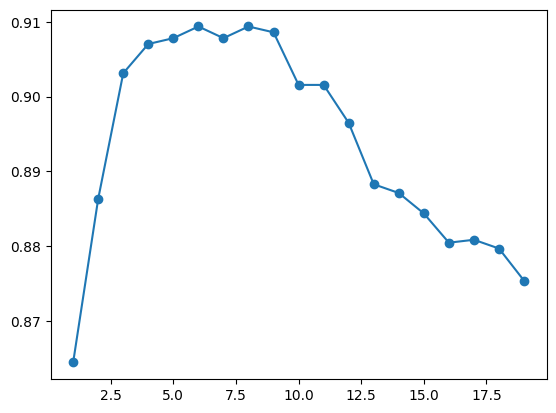

In [10]:
#tuning
values = [i for i in range(1,20)]
val_score = list()
for i in values:
    model = tr.DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)
    
    yhat_val = model.predict(x_val)
    acc_val = mt.accuracy_score(y_val,yhat_val)
    val_score.append(acc_val)
plt.plot(values, val_score, '-o', label = 'Val');

In [11]:
model = tr.DecisionTreeClassifier( max_depth = 7 )
model.fit(X_train, y_train)
yhat_val = model.predict(x_val)
acc_val = mt.accuracy_score(y_val,yhat_val)
acc_val

0.9078125

In [12]:
#model trained with train + validate
model_last = tr.DecisionTreeClassifier(max_depth=7)
model_last.fit(np.concatenate((X_train,x_val)),
               np.concatenate((y_train,y_val)))
yhat_test = model_last.predict(x_test)
acc_test = mt.accuracy_score(y_test,yhat_test)
acc_test

0.9109375

In [13]:
yhat_prod = model_last.predict(X_prod)
acc_prod = mt.accuracy_score(y_prod,yhat_prod)
acc_prod

0.91325

In [14]:
print('Accuracy of model on validations data is {}'.format(acc_val))
print('Accuracy of model on test data is {}'.format(acc_test))
print('Accuracy of model on new data is {}'.format(acc_prod))

Accuracy of model on validations data is 0.9078125
Accuracy of model on test data is 0.9109375
Accuracy of model on new data is 0.91325
